# College Experience Plays a Role in Getting a Job in the Tech Industry

##The data collected from Stack Overflow 2019 Survey results will be used for this analysis. The analysis aims to investigate the relevance of formal education in the profile of an average IT professional. The questions of interest:
1) What percentage of IT professionals are degree holders?
2) What are the chances of your getting a role in tech based on your education level?
3) What is the major course of study for most IT professionals?
4) What are useful interview tips that could land a person a tech role?

In [51]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#load data
data = pd.read_csv("/Users/olabisibalogun/Downloads/developer_survey_2019/survey_results_public.csv")

In [53]:
data_schema = pd.read_csv("/Users/olabisibalogun/Downloads/developer_survey_2019/survey_results_schema.csv")

In [54]:
#data.head()

In [55]:
#explore data schema for what different columns stand for
#data_schema.head(40)

In [56]:
#data_schema['QuestionText'][23]

In [57]:
#get number of rows and column
data.shape

(88883, 85)

The columns of interest for this analysis: EdLevel, UndergradMajor, and LastInt

In [58]:
#retrieve needed columns for analysis
data_needed = data[['Respondent','Employment','EdLevel','UndergradMajor', 'LastInt']]

In [59]:
#check columns with missing values
columns_with_missing = data_needed.columns[data_needed.isnull().any()].tolist()

In [60]:
#get the percentage of missing values in columns of interest
percent_missing = (data_needed.isnull().sum()/data_needed.shape[0])*100
missing_value_df = pd.DataFrame({'column_name':data_needed.columns, 'percent_missing':percent_missing})


In [61]:
percent_missing

Respondent         0.000000
Employment         1.914877
EdLevel            2.804811
UndergradMajor    14.928614
LastInt           24.445620
dtype: float64

The missing data in the columns of interest in this analysis could be due to the respondents that questions of the column does not apply to.

In [62]:
#check the data types of columns in the dataframe
#retrieve list of data types that are numeric or categorical
categorical_dtypes = data_needed.select_dtypes('object').columns.tolist()
numeric_dtypes = data_needed.select_dtypes(np.number).columns.tolist()

In [63]:
print(numeric_dtypes)
print(categorical_dtypes)

['Respondent']
['Employment', 'EdLevel', 'UndergradMajor', 'LastInt']


In [64]:
#check the choices for the employment column
employment_status = data_needed['Employment'].value_counts()
employment_status

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed     8511
Not employed, but looking for work                       5600
Employed part-time                                       4469
Not employed, and not looking for work                   3803
Retired                                                   358
Name: Employment, dtype: int64

In [65]:
#check the choices for the educational level column
education_level = data_needed['EdLevel'].value_counts()
education_level

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              39134
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           19569
Some college/university study without earning a degree                                10502
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8642
Associate degree                                                                       2938
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2432
Primary/elementary school                                                              1422
Professional degree (JD, MD, etc.)                                                     1198
I never completed any formal education                                                  553
Name: EdLevel, dtype: int64

In [66]:
#check the choices for the undergraduate major column
undergrad_major = data_needed['UndergradMajor'].value_counts()
undergrad_major

Computer science, computer engineering, or software engineering          47214
Another engineering discipline (ex. civil, electrical, mechanical)        6222
Information systems, information technology, or system administration     5253
Web development or web design                                             3422
A natural science (ex. biology, chemistry, physics)                       3232
Mathematics or statistics                                                 2975
A business discipline (ex. accounting, finance, marketing)                1841
A humanities discipline (ex. literature, history, philosophy)             1571
A social science (ex. anthropology, psychology, political science)        1352
Fine arts or performing arts (ex. graphic design, music, studio art)      1233
I never declared a major                                                   976
A health science (ex. nursing, pharmacy, radiology)                        323
Name: UndergradMajor, dtype: int64

Text(0.5,1,'Education Level')

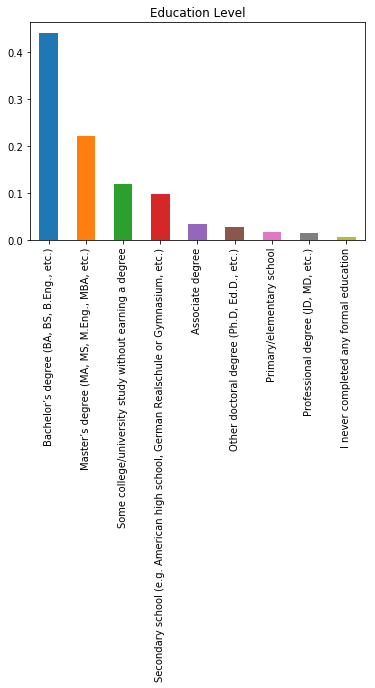

In [67]:
#basic exploration
education_level = data_needed['EdLevel'].value_counts()

(education_level/data_needed.shape[0]).plot(kind="bar")
plt.title("Education Level")

In [68]:
edlevel_percentage = ((education_level/data_needed.shape[0] )*100).round(2)
edlevel_percentage


Bachelor’s degree (BA, BS, B.Eng., etc.)                                              44.03
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           22.02
Some college/university study without earning a degree                                11.82
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     9.72
Associate degree                                                                       3.31
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2.74
Primary/elementary school                                                              1.60
Professional degree (JD, MD, etc.)                                                     1.35
I never completed any formal education                                                 0.62
Name: EdLevel, dtype: float64

Text(0.5,1,'Employment Status')

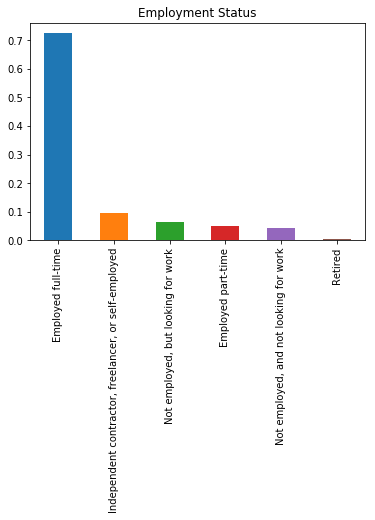

In [69]:
employment_status = data_needed['Employment'].value_counts()

(employment_status/data_needed.shape[0]).plot(kind="bar")
plt.title("Employment Status")

In [70]:
employment_percent = ((employment_status/data_needed.shape[0] )*100).round(2)

In [71]:
employment_percent

Employed full-time                                      72.50
Independent contractor, freelancer, or self-employed     9.58
Not employed, but looking for work                       6.30
Employed part-time                                       5.03
Not employed, and not looking for work                   4.28
Retired                                                  0.40
Name: Employment, dtype: float64

About 73% of Stack Overflow users are employed full time. Based on this, I will conduct varying analysis. First, let's see percentage of full-time employees that have a degree.

In [72]:
#group respondents by employment and education level columns.
by_employ_edlevel = data_needed.groupby(['Employment','EdLevel']).agg('count')

In [73]:
#flatten the dataframe
by_employ_edlevel = by_employ_edlevel.reset_index()
by_employ_edlevel = by_employ_edlevel[['Employment','EdLevel','Respondent']]

In [74]:
#by_employ_edlevel.head()

We dissect the 'by_employ_edlevel' dataframe by employment status then visualize the education level of individuals under each group.

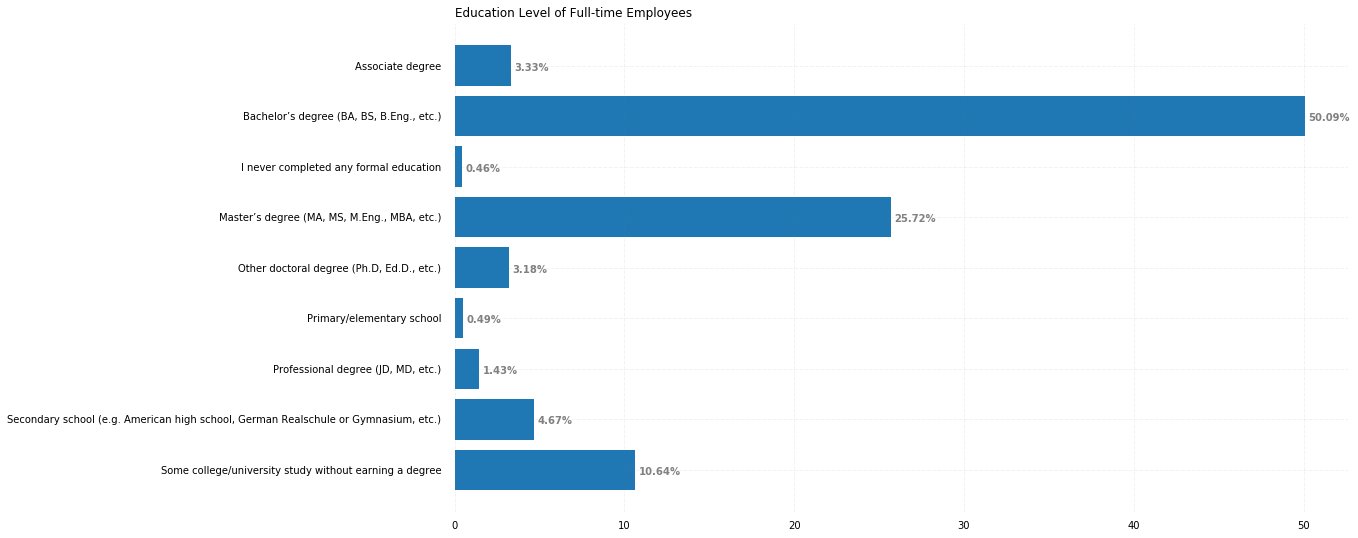

In [75]:

def plot_by_employment_status(df, status = 'Employed full-time'):
    '''
        INPUT: a dataframe and an employment status
        
        TASK: the function dissects the dataframe according to the employment status
        and creates a horizontal bar chart. For this analysis, employment status- full-time
        and searching are the concentration.
        
        OUTPUT: an annotated horizontal bar chart that compared the percentage of different
        levels of education based on their employment status
        
    '''
    #set size of plot
    fig,ax = plt.subplots(figsize=(16,9))
    df = df[df['Employment']==status]
    #Horizontal bar plot
    ax.barh(df['EdLevel'],(df['Respondent']/np.sum(df['Respondent']))*100)
    #remove axes splines
    for s in ['top','bottom','left','right']:
        ax.spines[s].set_visible(False)

    #remove x,y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    #add padding between axes and labels
    ax.xaxis.set_tick_params(pad=5)
    ax.yaxis.set_tick_params(pad =10)

    #Add x, y gridlines
    ax.grid(b=True, color='grey',linestyle='-.',linewidth=0.5, alpha=0.2)

    #show top values
    ax.invert_yaxis()

    #add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                 (str(round((i.get_width()),2))+'%'),
                fontsize=10, fontweight='bold',color='grey')
    return ax



ax = plot_by_employment_status(by_employ_edlevel)
#add plot title
ax.set_title("Education Level of Full-time Employees", loc="left")
#store plot
fig = plt.gcf()
#show plot
plt.show()
fig.savefig('education.png', bbox_inches='tight')



Let's see the education levels of professional searching for work.

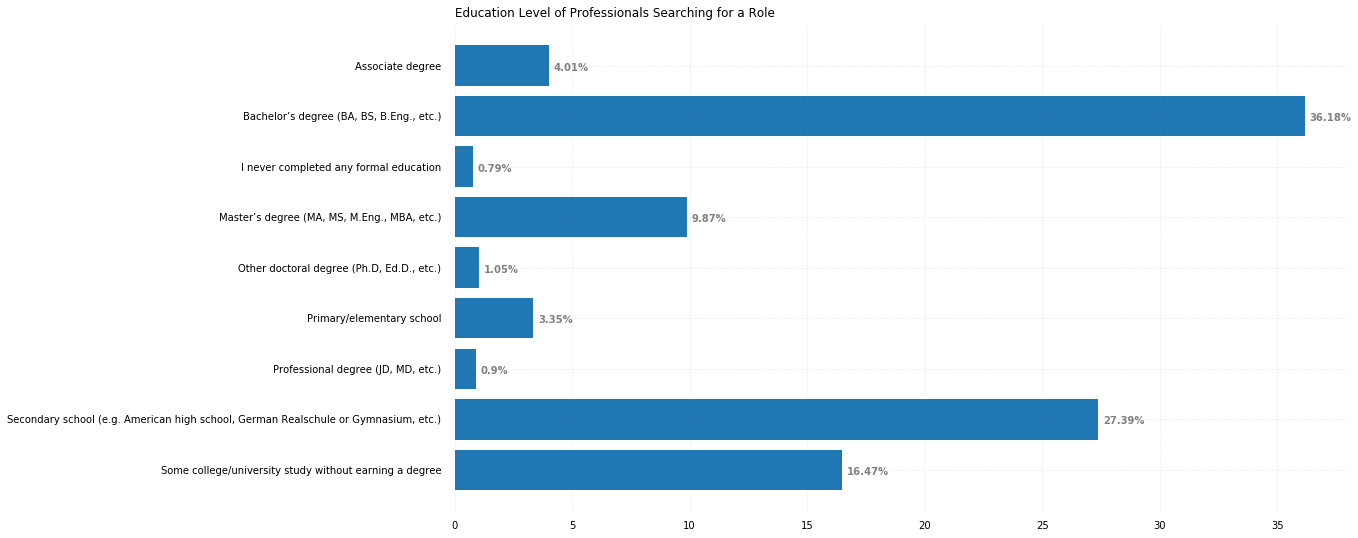

In [76]:
ax = plot_by_employment_status(by_employ_edlevel, status='Not employed, but looking for work')
#add plot title
ax.set_title("Education Level of Professionals Searching for a Role", loc="left")
#show plot
plt.show()

Let's compare the proportion of individuals reportedly working full-time and those searching for a role. That could tell us about the chances of getting a role based on your education level.

In [77]:
#subset data for full-time employees
df_full_time= by_employ_edlevel[by_employ_edlevel['Employment']=='Employed full-time']

In [78]:
#subset data for individuals looking for work
df_searching= by_employ_edlevel[by_employ_edlevel['Employment']=='Not employed, but looking for work']

In [79]:
'''calculate the ratio of individuals employed full-time to individuals looking 
for work based on their degree level. A dataframe will be created to display for 
every 100 individuals within an education level looking a for a job, 
the corresponding number of individuals working full-time with the same level of education'''

ratio = np.divide(df_full_time['Respondent'],df_searching['Respondent'])
list_series = [df_full_time['EdLevel'],ratio.round(2)]
df_ratio = (pd.concat(list_series, axis=1))
df_ratio = df_ratio.rename(columns={'EdLevel':'Education_Level','Respondent':'Respondent_Per_100'})

In [80]:
df_ratio

,Education_Level,Respondent_Per_100
0,Associate degree,9.84
1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",16.38
2,I never completed any formal education,6.90
3,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",30.85
4,"Other doctoral degree (Ph.D, Ed.D., etc.)",35.95
5,Primary/elementary school,1.72
6,"Professional degree (JD, MD, etc.)",18.79
7,"Secondary school (e.g. American high school, G...",2.02
8,Some college/university study without earning ...,7.65


It can be deduced from the table above that for every 100 persons looking for work, there is high chance of getting a job if you have some sort of college experience compared to someone without any college experience. The table also shows that the chances are higher for someone with an advanced degree.

Let's analyse the data to see the course of study of most IT professionals.

In [81]:
#group respondents by employment and undergrad columns.
by_employ_major = data_needed.groupby(['Employment','UndergradMajor']).agg('count')

In [82]:
#flatten the dataframe
by_employ_major = by_employ_major.reset_index()
by_employ_major = by_employ_major[['Employment','UndergradMajor','Respondent']]

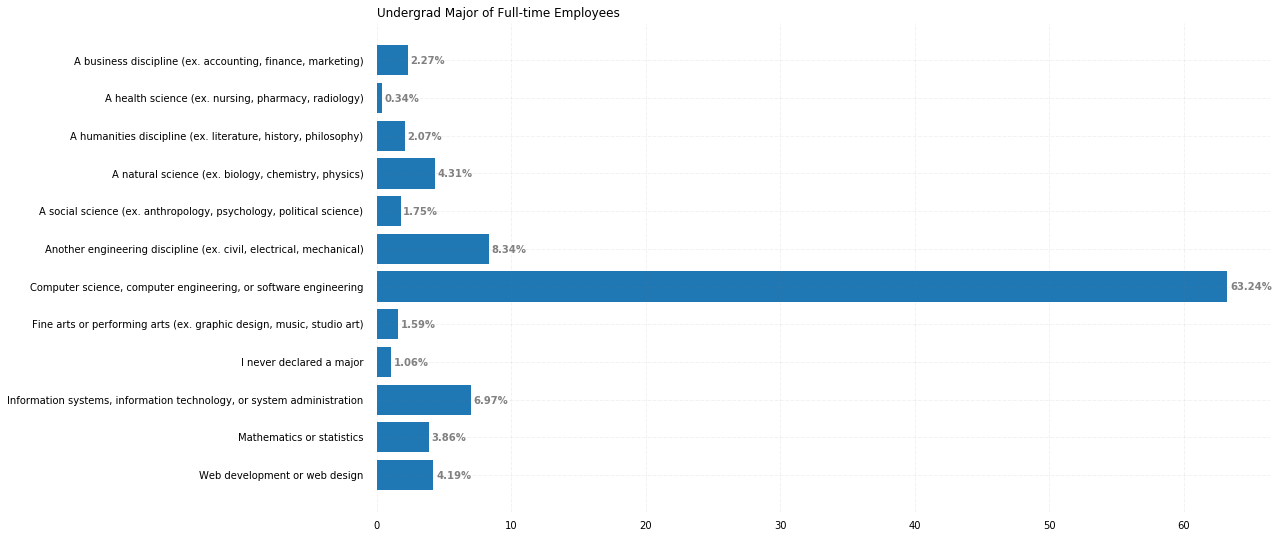

In [83]:
def plot_by_employment_status_major(df, status = 'Employed full-time'):
    #set size of plot
    fig,ax = plt.subplots(figsize=(16,9))
    df = df[df['Employment']==status]
    #Horizontal bar plot
    ax.barh(df['UndergradMajor'],(df['Respondent']/np.sum(df['Respondent']))*100)
    #remove axes splines
    for s in ['top','bottom','left','right']:
        ax.spines[s].set_visible(False)

    #remove x,y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    #add padding between axes and labels
    ax.xaxis.set_tick_params(pad=5)
    ax.yaxis.set_tick_params(pad =10)

    #Add x, y gridlines
    ax.grid(b=True, color='grey',linestyle='-.',linewidth=0.5, alpha=0.2)

    #show top values
    ax.invert_yaxis()

    #add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                 (str(round((i.get_width()),2))+'%'),
                fontsize=10, fontweight='bold',color='grey')
    return ax



ax = plot_by_employment_status_major(by_employ_major)
#add plot title
ax.set_title("Undergrad Major of Full-time Employees", loc="left")
#store plot
fig = plt.gcf()
#show plot
plt.show()
fig.savefig('major.png', bbox_inches='tight')

Individuals that have successfully landed a role shared the task they had to complete in the interview process. What step in interview process was mostly required?

In [147]:
#check the choices for the interview tasks column
interview_task = data_needed["LastInt"].value_counts()
#interview_task

In [48]:
#clean the LastInt column and create a dataframe off it
possible_interview_task = ["Interview with people in peer roles",
                           "Interview with people in senior / management roles",
                          "Write any code","Write code by hand",
                          "Complete a take-home project","Solve a brain-teaser style puzzle"]

def clean (df, title = 'Interview Tasks'):
    
    interview = df['LastInt'].value_counts().reset_index()
    interview.rename(columns={'index':'task','LastInt':'count'}, inplace=True)
    
    interview_task_dict = {}
    
    for task in possible_interview_task:
        count = np.sum(df['LastInt'].str.count(task))
        interview_task_dict[task] = count  
    
    interview_task_df = pd.DataFrame(list(interview_task_dict.items()),
                                     columns=['interview_task','count'])
            
 
    return interview_task_df

interview = clean(data_needed)
percent = (interview['count']/np.sum(interview['count']))*100
interview['percent'] = percent
interview = interview[['interview_task','percent']]
interview.sort_values(by=['percent'], inplace=True, ascending=False)

In [49]:
interview

,interview_task,percent
1,Interview with people in senior / management r...,31.970157
0,Interview with people in peer roles,24.071989
2,Write any code,15.532629
3,Write code by hand,11.073909
4,Complete a take-home project,9.667670
5,Solve a brain-teaser style puzzle,7.683647


Text(0,0.5,'Frequency')

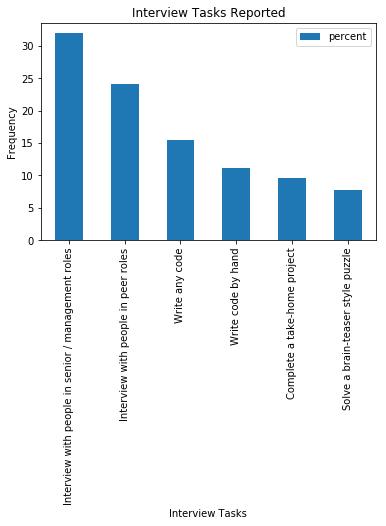

In [50]:
#visualize the interview tasks
interview.plot.bar(x="interview_task",rot=90)
plt.title("Interview Tasks Reported")
plt.xlabel("Interview Tasks")
plt.ylabel("Frequency")

From the table and the chart, interviews with peers and senior management are critical in securing a position in an organisation.